Рассмотрим алгоритм итерации по оценкам состояния $V$ (Value Iteration):
$$
V_{(i+1)}(s) = \max_a \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')]
$$
На основе оценки $V_i$ можно посчитать функцию оценки $Q_i$ действия $a$ в состоянии $s$:
$$
Q_i(s, a) = \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')]
$$
$$
V_{(i+1)}(s) = \max_a Q_i(s,a)
$$

### Среда

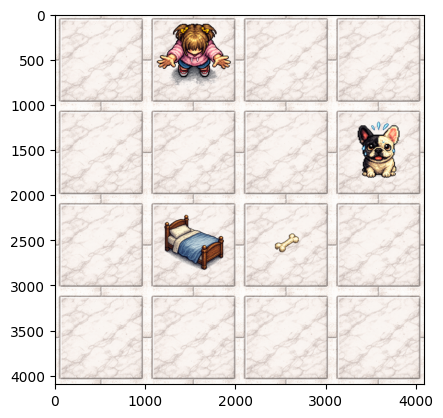

In [2]:
import matplotlib.pyplot as plt
from jack_the_dog import NoWalkEnv, ACTION
import gymnasium as gym


env = NoWalkEnv(seed=42)
observation, info = env.reset()
total_reward = 0
step = 0

terminated = False
truncated = False

img = env.render()
plt.imshow(img)
plt.show()


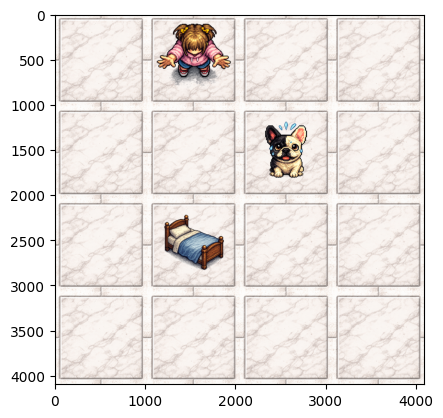

In [3]:
# Path to stank
trajectory = [ACTION.LEFT, ACTION.DOWN]

for action in trajectory:
    observation, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    
plt.imshow(img)
plt.show()


In [4]:

print("all_states =", env.get_all_states())
print("possible_actions('s1') =", env.get_possible_actions('s1'))
print("next_states('s1', 'a0') =", env.get_next_states('s1', 'a0'))
print("reward('s1', 'a0', 's0') =", env.get_reward('s1', 'a0', 's0'))
print("transition_prob('s1', 'a0', 's0') =", env.get_transition_prob('s1', 'a0', 's0'))

all_states = ('s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31')
possible_actions('s1') = ('a0', 'a1', 'a2', 'a3')
next_states('s1', 'a0') = {'s1': 1.0}
reward('s1', 'a0', 's0') = 0.0
transition_prob('s1', 'a0', 's0') = 0.0


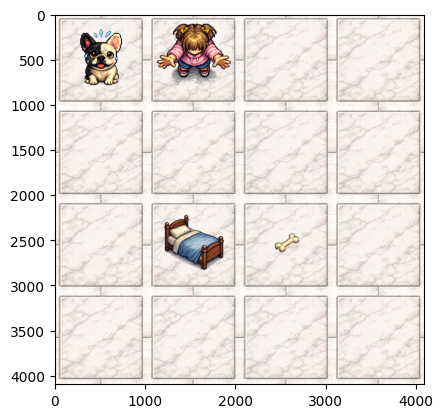

In [5]:
env.load_from_state_id(state_id='s0')

img = env.render()
plt.imshow(img)
plt.show()

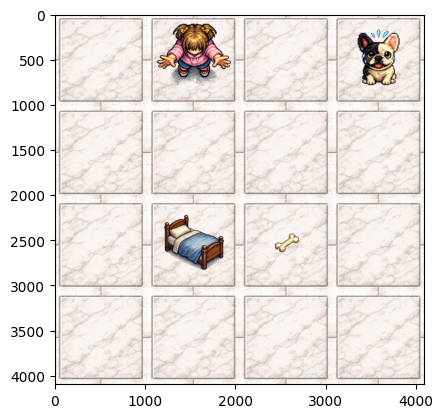

In [6]:
env.load_from_state_id(state_id='s6')

img = env.render()
plt.imshow(img)
plt.show()

### Реализация

In [7]:
import numpy as np
def get_action_value(mdp, state_values, state, action,
                     gamma):
    """ Вычислеям Q(s,a) по формуле выше """
    # вычислеяем оценку состояния
    # Q =
    """<codehere>"""
    t = [(prob * (mdp.get_reward(state, action, s) + gamma * state_values[s]))
             for s, prob in mdp.get_next_states(state, action).items()]
    Q = sum(t)
    """</codehere>"""

    return Q


In [9]:

def get_new_state_value(mdp, state_values, state, gamma):
    """ Считаем следующее V(s) по формуле выше."""
    if mdp.is_terminal(state):
        return 0
    # V =
    """<codehere>"""
    actions = [action for action in mdp.get_possible_actions(state)]
    t = [get_action_value(mdp, state_values, state, action, gamma)
             for action in actions]
    V = max(t)
    """</codehere>"""

    return V


In [10]:

def value_iteration(mdp, state_values=None,
    gamma = 0.9, num_iter = 1000, min_difference = 1e-5):
    """ выполняет num_iter шагов итерации по значениям"""
    # инициализируем V(s)
    state_values = state_values or \
    {s : 0 for s in mdp.get_all_states()}

    for i in range(num_iter):
        # Вычисляем новые полезности состояний,
        # используя функции, определенные выше.
        # Должен получиться словарь {s: new_V(s)}
        # new_state_values =
        """<codehere>"""
        new_state_values = {s : get_new_state_value(mdp, state_values, s, gamma) for s in mdp.get_all_states()}
        """</codehere>"""

        assert isinstance(new_state_values, dict)

        # Считаем разницу
        diff =  max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())

        print("iter %4i | diff: %6.5f | V(start): %.3f "%
          (i, diff, new_state_values[mdp._initial_state]))

        state_values = new_state_values
        if diff < min_difference:
            print("Принято! Алгоритм сходится!")
            break

    return state_values


env = NoWalkEnv(seed=42)
observation, info = env.reset()
state_values = value_iteration(env,
        num_iter = 100, min_difference = 0.001)

iter    0 | diff: 1.00000 | V(start): 0.000 
iter    1 | diff: 0.90000 | V(start): 0.090 
iter    2 | diff: 0.81000 | V(start): 0.810 
iter    3 | diff: 0.72900 | V(start): 0.860 
iter    4 | diff: 0.04455 | V(start): 0.860 
iter    5 | diff: 0.00000 | V(start): 0.860 
Принято! Алгоритм сходится!


In [11]:
import numpy as np
def get_optimal_action(mdp, state_values, state,
                       gamma=0.9):
    """ Находим оптимальное действие, используя формулу выше. """
    if mdp.is_terminal(state): return None

    actions = mdp.get_possible_actions(state)
    # выбираем лучшее действие
    # i =
    """<codehere>"""
    i = np.argmax([get_action_value(mdp, state_values, state, action, gamma) for action in actions])
    """</codehere>"""

    return actions[i]

In [12]:
import random
import re
# Visualisation of the optimal policy
def get_state(states):
    s = []
    p = []
    for key in states:
        prob = states[key]
        s.append(key)
        p.append(prob)
    return np.random.choice(s, p=p)

env = NoWalkEnv(seed=42)
observation, info = env.reset()
previos_state = env._initial_state


env.load_from_state_id(state_id=previos_state)
img = env.render()
imgs = [img]

for i in range(15):
    action = get_optimal_action(env, state_values, previos_state, gamma=0.9)
    next_states = env.get_next_states(previos_state, action)
    next_state = get_state(next_states)
    reward = env.get_reward(previos_state, action, next_state)
    terminated = env.is_terminal(next_state)
    
    
    print(previos_state, "->", next_state, "reward:", reward)
    env.load_from_state_id(state_id=next_state)
    previos_state = next_state
    
    img = env.render()
    imgs.append(img)
    
    if terminated:
        break



s14 -> s12 reward: 0.0
s12 -> s13 reward: 0.1
s13 -> s11 reward: 0.0
s11 -> s19 reward: 1.0


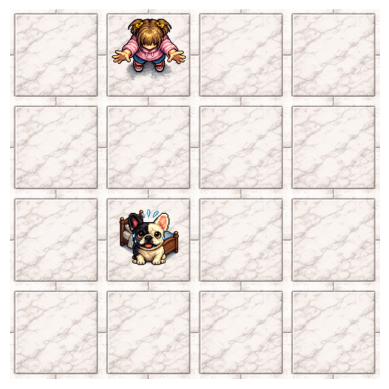

In [13]:
from IPython.display import clear_output

for img in imgs:
    clear_output(wait=True)  # стирает предыдущий вывод в ячейке
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [14]:
state_values

{'s0': 0.81,
 's1': 0.81,
 's2': 0,
 's3': 0,
 's4': 0.8595,
 's5': 0.81,
 's6': 0.7735500000000001,
 's7': 0.7290000000000001,
 's8': 0.9,
 's9': 0.9,
 's10': 1.0,
 's11': 1.0,
 's12': 0.9550000000000001,
 's13': 0.9,
 's14': 0.8595,
 's15': 0.81,
 's16': 1.0,
 's17': 1.0,
 's18': 0,
 's19': 0,
 's20': 1.0,
 's21': 1.0,
 's22': 0.9550000000000001,
 's23': 0.9,
 's24': 0.9,
 's25': 0.9,
 's26': 1.0,
 's27': 1.0,
 's28': 0.9550000000000001,
 's29': 0.9,
 's30': 0.8595,
 's31': 0.81}

In [15]:
from jack_the_dog.no_walk_env import StateValueOverlayWrapper

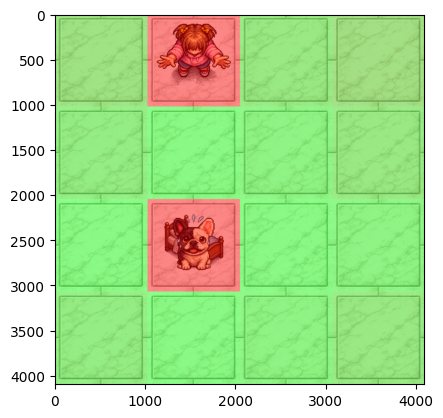

In [16]:
env =StateValueOverlayWrapper(env, state_values)

img = env.render()
plt.imshow(img)
plt.show()




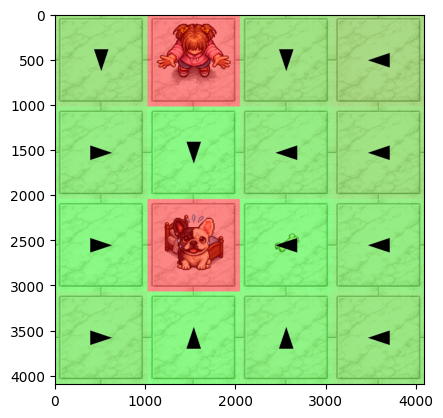

In [13]:
from jack_the_dog.no_walk_env import PolicyOverlayWrapper
env = PolicyOverlayWrapper(env, state_values)

img = env.render()
plt.imshow(img)
plt.show()
